In [19]:
import pandas as pd
import pickle

import numpy as np
import re
import tensorflow as tf
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the necessary datasets
nltk.download('punkt')  # For word_tokenize
nltk.download('punkt_tab')  # For word_tokenize
nltk.download('stopwords')  # For stopwords
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/ahmedelhefnawy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ahmedelhefnawy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ahmedelhefnawy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ahmedelhefnawy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Load the dataset
df = pd.read_csv('Data.csv', engine="python")
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
df.isna().sum()

data      0
labels    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(99)

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# Data Preprocessing

In [7]:
lemmatizer = WordNetLemmatizer()

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

# Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

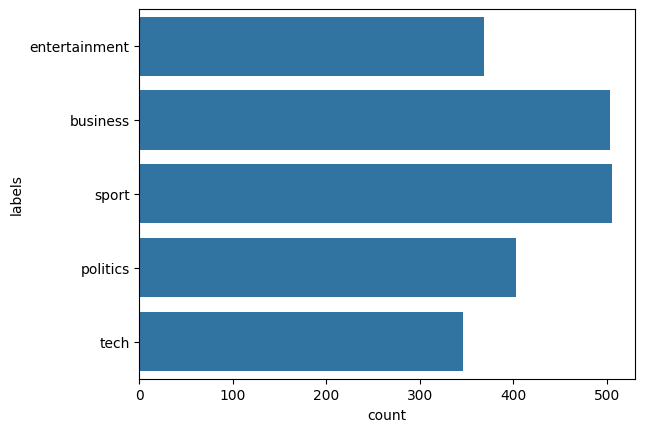

In [9]:
sns.countplot(df['labels'])
plt.show()

In [10]:
# Check class distribution
print("Original class distribution:")
print(df['labels'].value_counts())

# Get the minimum class count
min_class_count = df['labels'].value_counts().min()

# Balance the dataset by undersampling
balanced_df = pd.concat([
    df[df['labels'] == label].sample(n=min_class_count, random_state=42)
    for label in df['labels'].unique()
])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nBalanced class distribution:")
print(balanced_df['labels'].value_counts())
df = balanced_df

Original class distribution:
labels
sport            505
business         503
politics         403
entertainment    369
tech             346
Name: count, dtype: int64

Balanced class distribution:
labels
business         346
politics         346
tech             346
sport            346
entertainment    346
Name: count, dtype: int64


In [11]:
df['data'] = df['data'].apply(process_text)
df.head()

,data,labels
0,"[mcdonalds, sponsor, show, world, largest, res...",business
1,"[police, probe, mosque, leaflet, investigating...",politics
2,"[peugeot, deal, boost, mitsubishi, struggling,...",business
3,"[camera, phone, must, four, time, mobile, sold...",tech
4,"[foot, mouth, action, urged, senior, tory, cri...",politics


In [12]:
classes = df['labels'].unique()
classes

array(['business', 'politics', 'tech', 'sport', 'entertainment'],
      dtype=object)

# Preparing Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = df['data']
y = df['labels']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle= True)

In [16]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1384,) (346,)
(1384,) (346,)


## Make Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# Initialize the tokenizer without specifying num_words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

# Get the word counts
word_counts = tokenizer.word_counts

# Set a frequency threshold
frequency_threshold = 5

# Filter words based on the frequency threshold
# for word, count in word_counts.items():
#     if count < frequency_threshold:
#         tokenizer.word_index.pop(word)

# Convert texts to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)


In [21]:
# Save the tokenizer to disk
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
word_index = tokenizer.word_index
print(word_index)

word_dict = {v:k for k, v in word_index.items()}
print(word_dict)

{'said': 1, 'year': 2, 'also': 3, 'would': 4, 'time': 5, 'last': 6, 'could': 7, 'people': 8, 'first': 9, 'make': 10, 'world': 11, 'made': 12, 'told': 13, 'take': 14, 'well': 15, 'back': 16, 'three': 17, 'like': 18, 'week': 19, 'month': 20, 'added': 21, 'next': 22, 'number': 23, 'many': 24, 'company': 25, 'government': 26, 'since': 27, 'want': 28, 'come': 29, 'much': 30, 'still': 31, 'home': 32, 'firm': 33, 'country': 34, 'part': 35, 'good': 36, 'work': 37, 'xcxa': 38, 'five': 39, 'need': 40, 'going': 41, 'second': 42, 'game': 43, 'however': 44, 'right': 45, 'think': 46, 'already': 47, 'show': 48, 'used': 49, 'market': 50, 'service': 51, 'million': 52, 'group': 53, 'plan': 54, 'four': 55, 'best': 56, 'problem': 57, 'player': 58, 'high': 59, 'long': 60, 'even': 61, 'expected': 62, 'news': 63, 'play': 64, 'place': 65, 'minister': 66, 'including': 67, 'third': 68, 'based': 69, 'chief': 70, 'record': 71, 'help': 72, 'former': 73, 'according': 74, 'public': 75, 'around': 76, 'thing': 77, 'is

In [23]:
def decode(seq):
  return ' '.join([word_dict[i] for i in seq])

## Padding

In [24]:
# Calculate the maximum sequence length
max_sequence_length = len( max(x_train_sequences, key= len) )
print("Max Length: ", max_sequence_length)

# Pad sequences to ensure they have the same length
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length, padding='post')
x_test_padded  = pad_sequences(x_test_sequences, maxlen= max_sequence_length, padding='post')

Max Length:  1025


In [22]:
for item in x_train_sequences[:6]:
  print(item)
  print(decode(item))
  print(len(item) == len(decode(item).split()))
  print()

[223, 2293, 232, 1655, 158, 217, 1051, 292, 3478, 7, 3762, 4131, 315, 1187, 321, 8357, 5819, 11454, 1331, 310, 4, 477, 66, 6797, 333, 1, 2676, 297, 1720, 1787, 5, 3763, 3764, 47, 478, 1112, 90, 28, 378, 1164, 3, 3479, 54, 26, 110, 181, 792, 129, 4583, 1052, 452, 101, 102, 8358, 646, 159, 555, 980, 813, 17, 1188, 5820, 366, 6798, 266, 345, 15, 6799, 5095, 5821, 1607, 322, 1165, 193, 208, 4132, 328, 142, 536, 676, 2404, 633, 45, 3765, 6800, 733, 32, 224, 214, 1241, 13, 209, 55, 11, 3480, 290, 449, 6801, 1138, 776, 5822, 4584, 5096, 2075, 175, 93, 4585, 4133, 1721, 67, 323, 367, 124, 391, 868, 627, 1053, 1608, 357, 11455, 41, 5097, 8359, 42, 155, 5823, 827, 218, 511, 259, 1216, 103, 6802, 647, 596, 183, 1332, 933, 2294, 1545, 125, 279, 34, 527, 591, 108, 201, 2843, 869, 191, 11456, 1609, 61, 339, 20, 960, 912, 1289, 1290, 8, 3766, 870, 21, 2512, 2844, 11457, 406]
blair reject tory terror offer tony rejected conservative compromise could eased passage anti legislation wanted sunset clause 

## One Hot Encoding

In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [27]:
with open('label_encoder.pkl', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot  = to_categorical(y_test_encoded)

In [26]:
print(x_train_padded.shape, y_train_one_hot.shape)
print(x_test_padded.shape, y_test_one_hot.shape)

(1384, 1025) (1384, 5)
(346, 1025) (346, 5)


In [27]:
print(x_train_padded)
print(y_train_one_hot)

[[ 223 2293  232 ...    0    0    0]
 [1841 5824  607 ...    0    0    0]
 [5826   16 1217 ...    0    0    0]
 ...
 [8854 5713 3820 ...    0    0    0]
 [5391 6442 5636 ...    0    0    0]
 [3391  695  102 ...    0    0    0]]
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


# Building the model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dense, Dropout, Flatten, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [48]:
num_words = len(tokenizer.word_index) + 1
model = Sequential([
    Input(shape=(max_sequence_length,)),
    Embedding(input_dim= num_words, output_dim= 128,),
    Bidirectional(SimpleRNN(32, dropout= 0.5)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

In [49]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_padded, y_train_one_hot, epochs=10, validation_split=0.2)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.2212 - loss: 1.6343 - val_accuracy: 0.2094 - val_loss: 1.6042
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.3546 - loss: 1.5161 - val_accuracy: 0.3249 - val_loss: 1.5513
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.6191 - loss: 1.2601 - val_accuracy: 0.4838 - val_loss: 1.2903
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.8213 - loss: 0.7103 - val_accuracy: 0.5596 - val_loss: 1.0746
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9446 - loss: 0.3292 - val_accuracy: 0.5993 - val_loss: 0.9955
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.9806 - loss: 0.1404 - val_accuracy: 0.6065 - val_loss: 0.9510
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.9934 - loss: 0.0738 - val_accuracy: 0.5668 - val_loss: 1.1329
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.9950 - loss: 0.0592 - val_accurac

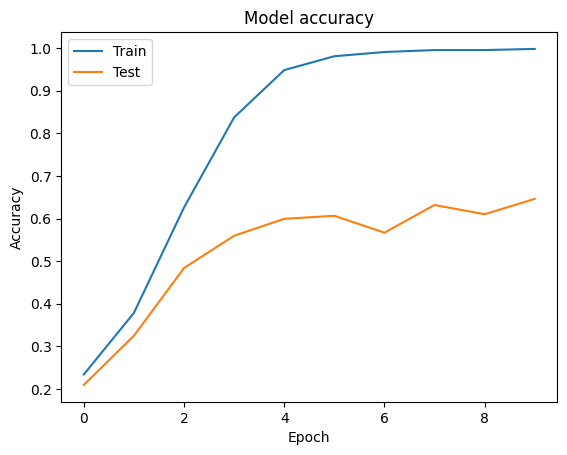

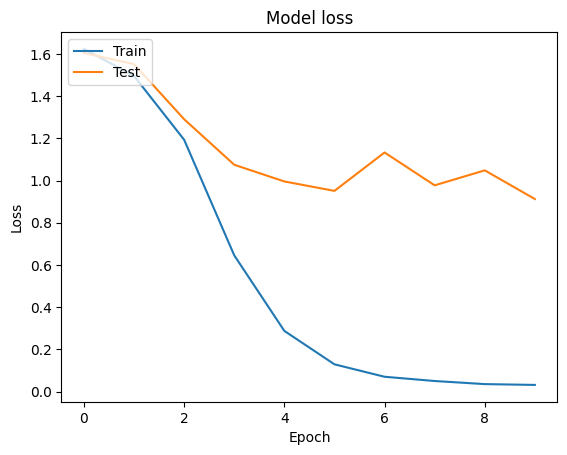

In [50]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


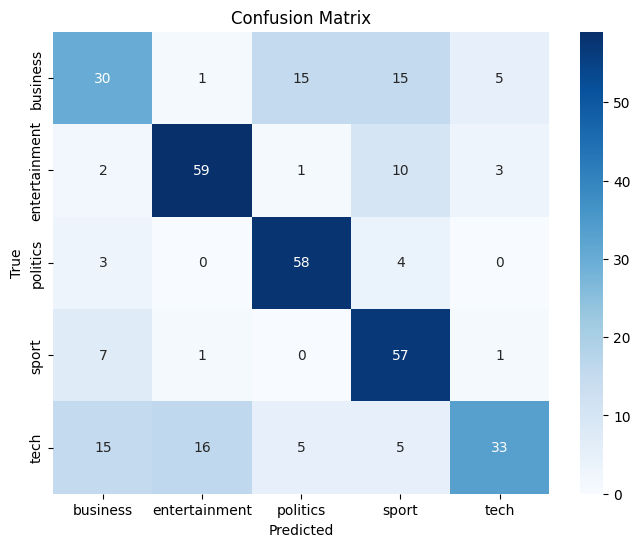

In [51]:
y_pred_probs = model.predict(x_test_padded)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [52]:
num_words = len(tokenizer.word_index) + 1
model = Sequential([
    Input(shape=(max_sequence_length,)),
    Embedding(input_dim= num_words, output_dim= 128,),
    Bidirectional(LSTM(32, dropout= 0.5)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

In [53]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_padded, y_train_one_hot, epochs=10, validation_split=0.2)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.1968 - loss: 1.6101 - val_accuracy: 0.3502 - val_loss: 1.5968
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.3784 - loss: 1.5311 - val_accuracy: 0.4477 - val_loss: 1.1958
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6221 - loss: 1.0035 - val_accuracy: 0.7581 - val_loss: 0.7367
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8081 - loss: 0.5962 - val_accuracy: 0.8664 - val_loss: 0.4454
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9576 - loss: 0.2652 - val_accuracy: 0.9206 - val_loss: 0.3101
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9867 - loss: 0.1155 - val_accuracy: 0.9242 - val_loss: 0.2750
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9936 - loss: 0.0641 - val_accuracy: 0.9061 - val_loss: 0.2811
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9944 - loss: 0.0491 - val_accuracy: 0.8773 - v

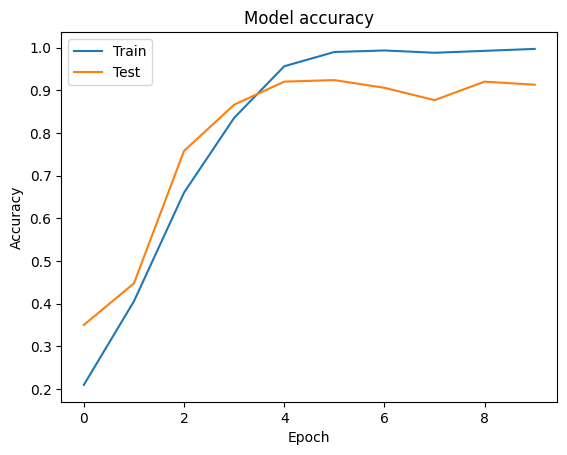

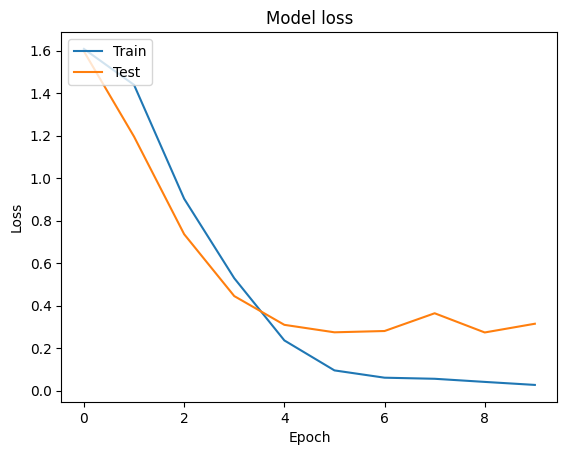

In [54]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


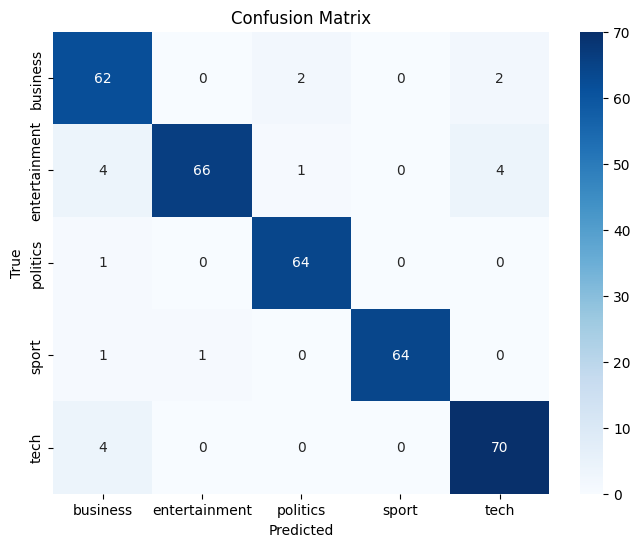

In [55]:
y_pred_probs = model.predict(x_test_padded)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
